# **The Problem Description**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## Importing all the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Load the Data

In [ ]:
train = pd.read_csv('/content/TrainData.csv')

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.describe()

print(train.shape)

(8523, 12)


In [ ]:
test = pd.read_csv('/content/TestData.csv')

In [ ]:
test.shape

(5681, 11)

## Checking Null Values

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Lets Visualize The Data for better Understanding

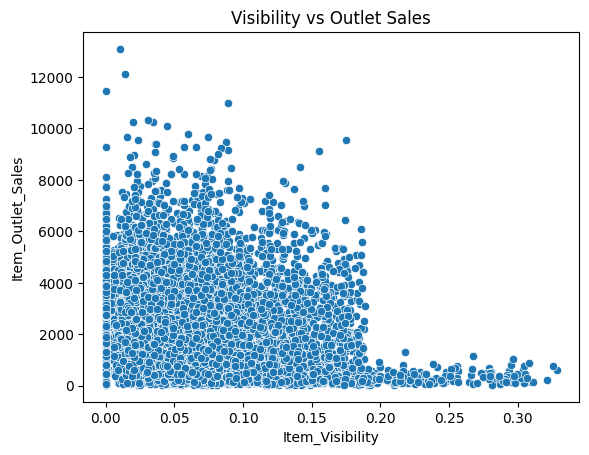

In [ ]:
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train)
plt.title("Visibility vs Outlet Sales")
plt.show()


<ipython-input-11-d38fb27278f0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = train,
<ipython-input-11-d38fb27278f0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = train,


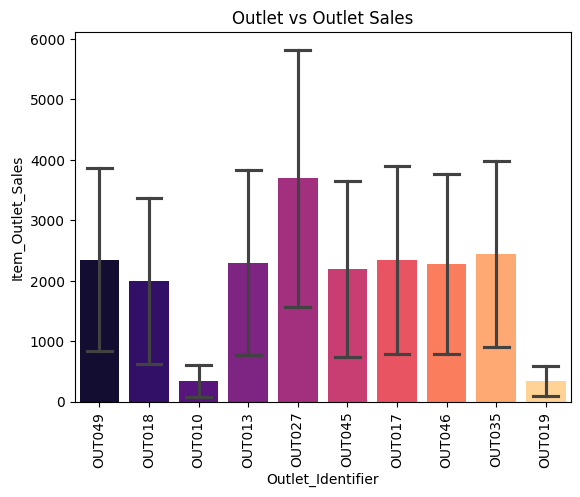

In [ ]:
sns.barplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = train,
            palette = 'magma', capsize = 0.5, saturation = 8, ci = 'sd')
plt.title("Outlet vs Outlet Sales")
plt.xticks(rotation=90)

plt.show()


## Check which item sold the most

<ipython-input-12-1edf7d5b7120>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = train,


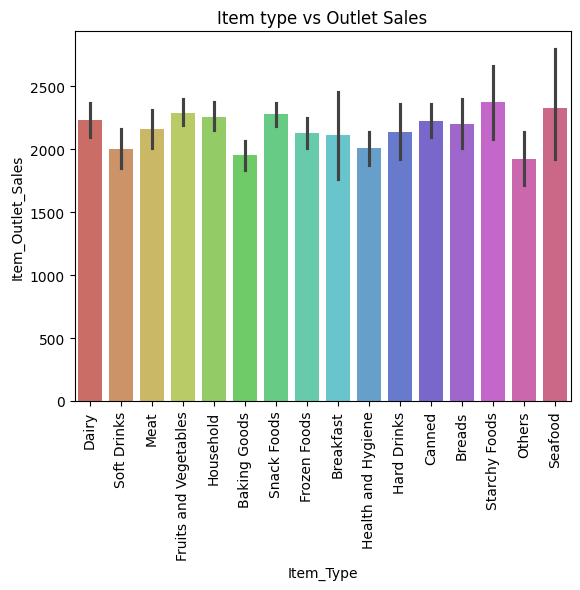

In [ ]:
sns.barplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = train,
            palette = 'hls')
plt.title("Item type vs Outlet Sales")
plt.xticks(rotation=90)

plt.show()


## Find the outlier using Box Plot

<ipython-input-13-710f80098b63>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Item_Type', y = 'Item_MRP', data = train, palette = 'Paired')


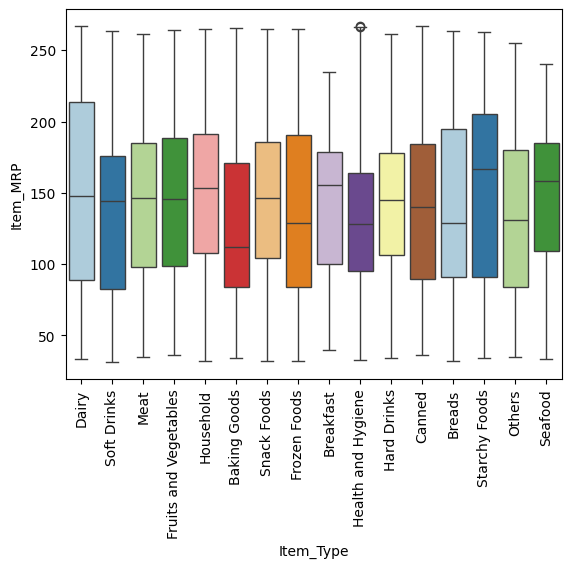

In [ ]:
sns.boxplot(x = 'Item_Type', y = 'Item_MRP', data = train, palette = 'Paired')
plt.xticks(rotation=90)
plt.show()


Finding 1 : Health and Hygiene has outlier.

## Data cleaning

In [ ]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
len(train['Item_Visibility'].value_counts())

7880

Finding 2 : Item Visibility Cannot be 0

In [ ]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

## Quick Observation from Dataset So Far:
1. Item_Fat_Content has mismatched Levels like LF = Low Fat, reg = Regular
2. Min(Item_Visibility) = 0, which is practically not possible, Treating 0's as Missing Values
3. Item_weight has 1463 Missing Values.
4. Outlet_size has also missing values of 2410.

In [ ]:
train['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
test['Item_Outlet_Sales'] = 1
test['Item_Outlet_Sales'].head()

0    1
1    1
2    1
3    1
4    1
Name: Item_Outlet_Sales, dtype: int64

In [ ]:
test.shape

(5681, 12)

In [ ]:
train_copy = train.copy()
test_copy = test.copy()

In [ ]:
combined = pd.concat([train, test])
combined.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3816,DRD01,12.1,Regular,0.061522,Soft Drinks,55.8614,OUT017,2007,NaN,Tier 2,Supermarket Type1,1436.7964


In [ ]:
combined.shape

(14204, 12)

## Filling Outlet Size

Outlet size depens on the outlet type and the location of outlet

In [ ]:
crosstable = pd.crosstab(train['Outlet_Size'], train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [ ]:
dic = {'Grocery Store' : 'Small'}

s = train.Outlet_Type.map(dic)

In [ ]:
train.Outlet_Size = train.Outlet_Size.combine_first(s)

In [ ]:
train['Outlet_Size'].value_counts()

Outlet_Size
Small     2943
Medium    2793
High       932
Name: count, dtype: int64

In [ ]:
train.isnull().sum(axis = 0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In real world it is mostly seen that outlet size varies with the location of the outlet, hence checking betwwen the same

In [ ]:
crosstable = pd.crosstab(train['Outlet_Size'], train['Outlet_Location_Type'])
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


From the above table it is evident that all the Tier 2 stores are of small types

Therefore mapping Tier 2 store and small size

In [ ]:
dic = {'Tier 2': 'Small'}

s = train['Outlet_Location_Type'].map(dic)

train['Outlet_Size'] = train['Outlet_Size'].combine_first(s)

train['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [ ]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.Item_Identifier.value_counts().sum()

8523

Outlet size missing values have been imputed

Instead of imputing with the overall mean of all the items. It would be better to impute it with the mean of particular item type - Food,Dricks,Non-Consumable. Did this as some products may be on the heavier side and some on the lighter.

In [ ]:
train['Item_Weight'] = train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


The above 4 item weights werent imputed because in the dataset there is only one record for each of them. Hence mean could not be caculated

So, we will fill Item_Weight by the corresponding Item_Type for these 4 values

In [ ]:
# List of item types
item_type_list = train.Item_Type.unique().tolist()
item_type_list

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [ ]:
# grouping based on item type and calculating mean of item weight
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean()

In [ ]:

Item_Type_Means = Item_Type_Means.sort_values(ascending=False)


In [ ]:
Item_Type_Means

Item_Type
Others                   13.979438
Starchy Foods            13.841385
Household                13.524780
Dairy                    13.379905
Fruits and Vegetables    13.236713
Health and Hygiene       13.052327
Snack Foods              13.031230
Frozen Foods             12.782404
Breakfast                12.779727
Meat                     12.771212
Seafood                  12.521953
Canned                   12.403320
Baking Goods             12.285317
Soft Drinks              11.879775
Hard Drinks              11.456238
Breads                   11.297689
Name: Item_Weight, dtype: float64

In [ ]:
# Mapping item weight to item type mean

for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = train.Item_Type.map(dic)

    train.Item_Weight = train.Item_Weight.combine_first(s)

Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean()

train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
Item_Type_Means = Item_Type_Means.sort_values(ascending=False)

Missing values for item_weight have been imputed

In [ ]:
train.Item_Weight.isnull().any()  # no missing value

False

# Imputing for item visibility

Item visibility cannot be 0 and should be treated as missing values and imputed



In [ ]:
train.Item_Visibility.value_counts().head() # There are 526 values with 0 Item visibility

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: count, dtype: int64

Imputing with mean of item_visibility of particular item identifier category as some items may be more visible (big - TV,Fridge etc) and some less visible (Shampoo Sachet,Surf Excel and other such small pouches)

In [ ]:
#Replacing 0's with NaN

train.Item_Visibility.replace(to_replace = 0.000000, value = np.NaN, inplace =True)

train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [ ]:
train.Item_Visibility.value_counts().head()

Item_Visibility
0.121880    4
0.027777    3
0.029511    3
0.081428    3
0.016164    3
Name: count, dtype: int64

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


### Renaming Item_Fat_Content levels


In [ ]:
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
train.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
train['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [ ]:
train['Outlet_Year'] = (2013 - train.Outlet_Establishment_Year)

In [ ]:
print(train["Outlet_Year"])
print(train["Outlet_Establishment_Year"])

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64
0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64


### Encoding Categorical Variables

In [ ]:
var_cat = train.select_dtypes(include=[object])
var_cat.head()
var_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
var_cat = var_cat.columns.tolist()

var_cat = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

var_cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
train['Item_Type_New'] = train.Item_Identifier
train.Item_Type_New.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Type_New, dtype: object

In [ ]:
train.Item_Type_New.replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
train.Item_Type_New.replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


In [ ]:
le = LabelEncoder()

In [ ]:
train['Outlet'] = le.fit_transform(train.Outlet_Identifier)
train['Item'] = le.fit_transform(train.Item_Type_New)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New,Outlet,Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,9,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks,3,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,9,1
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,0,1
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,1,2


In [ ]:
for i in var_cat:
    train[i] = le.fit_transform(train[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Item_Type_New,Outlet,Item
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,14,Food,9,1
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,4,Drinks,3,0
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,14,Food,9,1
3,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,2,2,0,732.3800,15,Food,0,1
4,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,0,2,1,994.7052,26,Non-Consumable,1,2


In [ ]:
corrmat = train.select_dtypes(include='number').corr()

In [ ]:
# corrmat = train.corr()
corrmat

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet,Item
Item_Weight,1.000000,-0.026797,-0.021226,0.035710,0.025967,-0.013417,-0.012445,0.002973,0.000592,0.013198,0.013417,-0.007586,0.071585
Item_Fat_Content,-0.026797,1.000000,0.052620,-0.139434,0.006063,0.003151,-0.001262,-0.001598,0.002199,0.018719,-0.003151,0.000764,-0.166111
Item_Visibility,-0.021226,0.052620,1.000000,-0.042400,-0.005951,-0.075238,0.090322,-0.030449,-0.170752,-0.126026,0.075238,-0.096282,-0.050520
Item_Type,0.035710,-0.139434,-0.042400,1.000000,0.032651,0.004970,-0.000218,0.003084,0.003053,0.017048,-0.004970,0.001656,0.007456
Item_MRP,0.025967,0.006063,-0.005951,0.032651,1.000000,0.005020,0.000872,0.000232,-0.001975,0.567574,-0.005020,0.003319,0.032517
Outlet_Establishment_Year,-0.013417,0.003151,-0.075238,0.004970,0.005020,1.000000,0.425534,-0.089216,-0.122304,-0.049135,-1.000000,0.079035,-0.008551
Outlet_Size,-0.012445,-0.001262,0.090322,-0.000218,0.000872,0.425534,1.000000,-0.480075,-0.401373,-0.162753,-0.425534,0.260272,-0.001276
Outlet_Location_Type,0.002973,-0.001598,-0.030449,0.003084,0.000232,-0.089216,-0.480075,1.000000,0.467219,0.089367,0.089216,-0.716176,0.007661
Outlet_Type,0.000592,0.002199,-0.170752,0.003053,-0.001975,-0.122304,-0.401373,0.467219,1.000000,0.401522,0.122304,0.099873,0.001136
Item_Outlet_Sales,0.013198,0.018719,-0.126026,0.017048,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000,0.049135,0.162325,0.011236


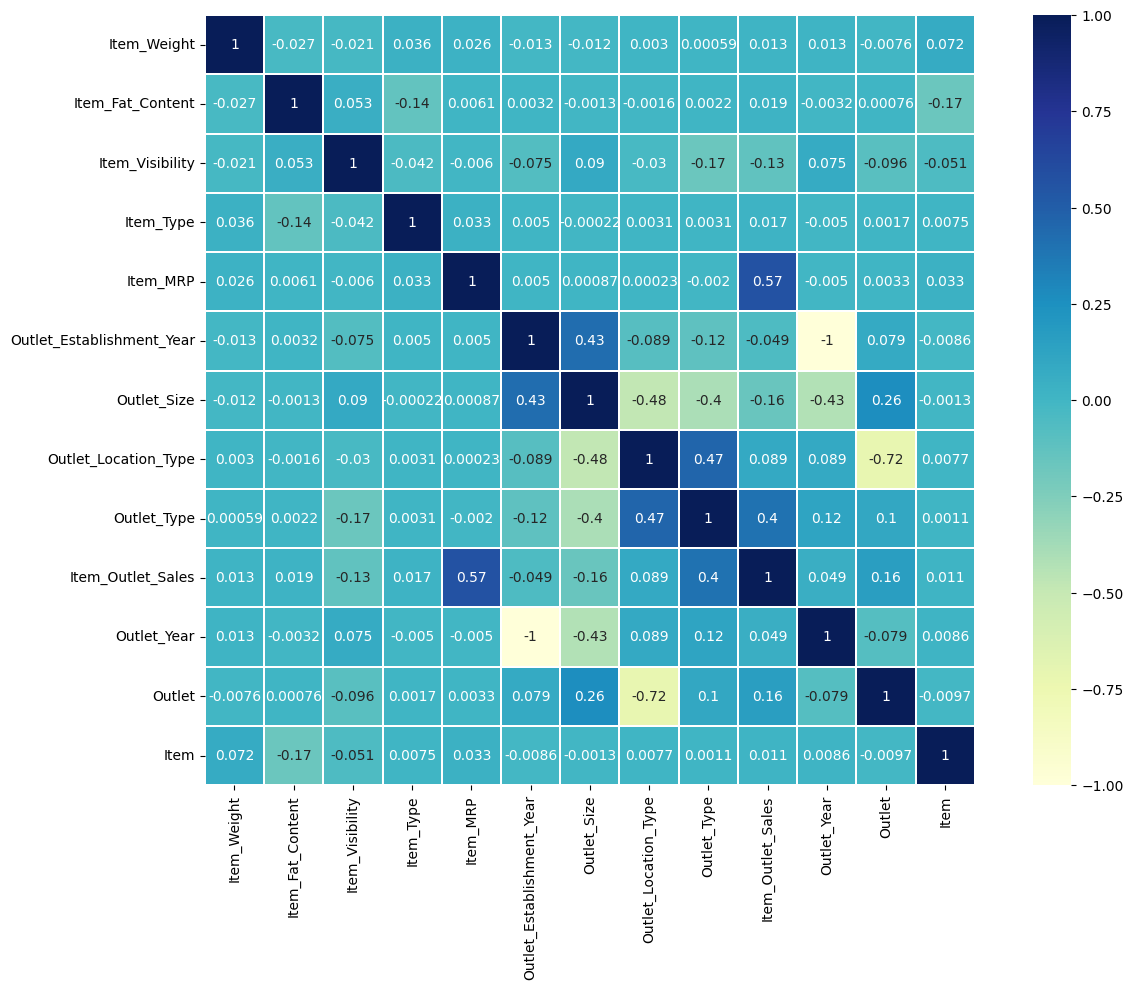

In [ ]:
f, ax = plt.subplots(figsize = (15,10))

sns.heatmap(corrmat, annot = True, ax = ax, cmap = 'YlGnBu', linewidths = 0.1, square = True)
plt.show()

# Predictive Modelling

In [ ]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year',
            'Outlet','Item','Item_Weight']

In [ ]:
seed = 240
np.random.seed(seed)

In [ ]:
X = train[predictors]
y = train.Item_Outlet_Sales

In [ ]:
X.head(4)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,14,9,1,9.30
1,1,0.019278,14,48.2692,1,2,2,4,3,0,5.92
2,0,0.016760,10,141.6180,1,0,1,14,9,1,17.50
3,1,0.022911,6,182.0950,2,2,0,15,0,1,19.20


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [ ]:
X_train.shape

(6392, 11)

In [ ]:
print(y_test.shape)

(2131,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred[:5]

array([1008.45407221,  694.2737362 , 1001.31600703, 4258.41831096,
       3063.11801929])

# Plot the Model

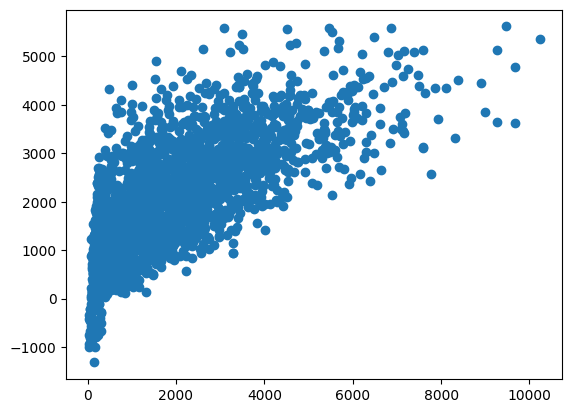

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
# Accuracy Score

print("Linear Regression Model Score:", model.score(X_test, y_test))

Linear Regression Model Score: 0.5052133696581127


In [ ]:
ori_val = y_test

In [ ]:
# Root Means Square Error
rmse = np.sqrt(metrics.mean_squared_error(ori_val, y_pred))

In [ ]:
print("Linear Regression R2 score: ",metrics.r2_score(ori_val, y_pred))

Linear Regression R2 score:  0.5052133696581127


In [ ]:
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1168.3771118194904


# Linear Regression wihtout cross validation:

* Linear Regression R2 score:  0.50521
* Linear Regression RMSE:  1168.377



In [ ]:
# LR with Statsmodels

x = sm.add_constant(X_train)
res = sm.OLS(y_train, x).fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     584.9
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        18:08:23   Log-Likelihood:                -54463.
No. Observations:                6392   AIC:                         1.090e+05
Df Residuals:                    6380   BIC:                         1.090e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -841.4599    129.806     -6.482      0.000   -1095.923    -586.996
Item_Fat_Content        81.1896     32.592      2.491      0.013      17.299     145.081
Item_Visibility      -1581.9458    314.339     -5.033      0.000   -2198.156    -965.735
Item_Type                0.1367      3.663      0.037      0.970      -7.044       7.317
Item_MRP                15.6333      0.243     64.333      0.000      15.157      16.110
Outlet_Size           -151.9287     29.168     -5.209      0.000    -209.107     -94.750
Outlet_Location_Type   -96.7356     43.708     -2.213      0.027    -182.418     -11.053
Outlet_Type            819.6678     31.057     26.392      0.000     758.785     880.550
Outlet_Year             -0.2265      2.053     -0.110      0.912      -4.251       3.798
Outlet                  59.5489     10.906      5.460      0.000      38.169      80.929
Item                     5.5255     29.549      0.187      0.852     -52.400      63.451
Item_Weight             -2.5387      3.292     -0.771      0.441      -8.993       3.915
==============================================================================
Omnibus:                      589.676   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.869
Skew:                           0.608   Prob(JB):                    8.44e-258
Kurtosis:                       4.722   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = res.predict(x).rename("y_pred")

In [ ]:
y_pred

4776    4563.612802
7510    3386.056074
5828    2623.734246
5327    1182.020927
4810    1812.940626
           ...     
5734     444.420549
5191     658.888689
5390    3640.170568
860     1408.891510
7270    1587.758004
Name: y_pred, Length: 6392, dtype: float64

In [ ]:
y_pred_df = pd.DataFrame({"y_pred": y_pred})

joined = x.join(y_pred)
joined.head()

,const,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight,y_pred
4776,1.0,0,0.029565,9,256.4646,1,2,2,4,3,2,16.350,4563.612802
7510,1.0,1,0.065917,13,179.7660,1,2,2,4,3,1,15.250,3386.056074
5828,1.0,1,0.158716,10,157.2946,1,0,1,14,9,1,12.350,2623.734246
5327,1.0,0,0.014628,0,82.3250,2,1,1,9,6,1,7.975,1182.020927
4810,1.0,0,0.016645,5,120.9098,2,1,1,11,7,1,19.350,1812.940626


# Performing Cross Validation


In [ ]:
# Perform 6-fold Cross Validate

score = cross_val_score(model, X, y, cv = 5)

print("LR Cross Val Score: ", score)

LR Cross Val Score:  [0.51828865 0.5023478  0.48262104 0.50311721 0.4998021 ]


In [ ]:
predict = cross_val_predict(model, X, y, cv = 6)
predict[:5]

array([4176.33789161, 1411.34617329, 2489.52441577, 1484.81451779,
        620.00074558])

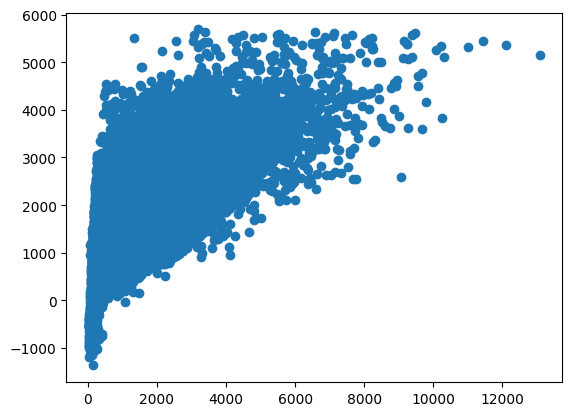

In [ ]:
plt.scatter(y,predict)
plt.show()

In [ ]:
accuracy = metrics.r2_score(y,predict)
print("Linear Regression R2 with CV: ",accuracy)

Linear Regression R2 with CV:  0.5012858273744879


In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y,predict))
print("Linear Regression RMSE with CV:",rmse)

Linear Regression RMSE with CV: 1205.054172193007


## Linear Regression with Cross- Validation

* Linear Regression R2 with CV: 0.501

* Linear Regression RMSE with CV: 1205.05



# Using KFold Validation

In [ ]:
def cal_mat(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)

    train_error = cal_train_error(X_train , y_train, model)

    val_error = cal_val_error(X_test, y_test, model)

    return train_error, val_error


In [ ]:
def cal_train_error(X_train , y_train, model):
    '''returns in-sample error for already fit model.'''

    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [ ]:
def cal_val_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''

    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [ ]:
kf = KFold(n_splits = 10)

In [ ]:
kf.get_n_splits(X)

10

In [ ]:
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [ ]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

In [ ]:
for alpha in alphas:

    train_errors = []
    val_errors = []

    for train_idx, val_idx in kf.split(X_train, y_train):
      X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
      y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

      lasso_model = Lasso(alpha = alpha, fit_intercept = True, random_state = 77)

      train_error, val_error = cal_mat(X_train, y_train, X_val, y_val, lasso_model)

      train_errors.append(train_error)
      val_errors.append(val_error)


    # generate Report

    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(val_errors),4)))


alpha: 0.0001 | mean(train_error): 1490429.3298 | mean(val_error): 1556916.3176
alpha:  0.001 | mean(train_error): 1508668.3588 | mean(val_error): 1567774.3243
alpha:   0.01 | mean(train_error): 1477577.0816 | mean(val_error): 1557768.398
alpha:    0.1 | mean(train_error): 1502905.3351 | mean(val_error): 1589955.1363
alpha:      1 | mean(train_error): 1541808.6108 | mean(val_error): 1631637.2118
alpha:   10.0 | mean(train_error): 1565274.9439 | mean(val_error): 1651392.3248


# Decision Tree Regressor


In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
y_pred2[:5]

array([ 535.969 ,  796.9626,  540.6296, 2854.9504, 2652.5472])

In [ ]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
results.head()

,Actual,Predicted
7503,1743.0644,535.9690
2957,356.8688,796.9626
7031,377.5086,540.6296
1084,5778.4782,2854.9504
856,2356.9320,2652.5472


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 1049.145519568278
Mean Squared Error: 2505760.9516042126
Root Mean Squared Error: 1582.959554633097


# Decision Tree Regression with Kfold validation

* Mean Absolute Error: 1049.1455
* Mean Squared Error: 2505760.9516
* Root Mean Squared Error: 1582.9595

# Random Forest Regressor


In [ ]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred3 = rf.predict(X_test)
y_pred3[:5]

array([ 796.09706 ,  804.932226,  720.821712, 4159.066176, 2327.996332])

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred3))
rmse

1104.3853709974635

In [ ]:
print(metrics.r2_score(y_test,y_pred3))

0.5579278404851161


In [ ]:
results2 = pd.DataFrame({'Actual':y_test,'Predicted': y_pred3})
results2.head()

,Actual,Predicted
7503,1743.0644,796.097060
2957,356.8688,804.932226
7031,377.5086,720.821712
1084,5778.4782,4159.066176
856,2356.9320,2327.996332


# Randorm Forest Regression with kfold validation score

* RMSE: 1104.38
* R2 Score: 0.55